<h1 style="text-align:center;">CREATING A BOOK RECOMMENDATION SYSTEM</h1>


<h2 style="text-align:center;">BUSINESS UNDERSTANDING  </h2>

<h3 style="text-align:left;">Project Overview  </h3>

Recommendation systems are powerful tools that use machine learning algorithms to provide suggestions that are useful to users based on behaviour or habit patterns or user data. 
A Book Recommendation System is a machine learning-based solution designed to suggest books to users based on their preferences and behavior. Recommendation systems enhance user engagement, drive sales, and improve customer satisfaction by providing personalized suggestions. This project aims to utlize advance machine learning tools to develop a book recommendation system that is tailored to meet personalized customers needs and preferences therefore helping customers with the challenge of locating or choosing which books to read considering the large electronic book presence. The data used is from Kaggle  [Kaggle](https://www.kaggle.com/datasets/somnambwl/bookcrossing-dataset/data)

There are two primary approaches to recommendation systems:

1. Collaborative Filtering – Uses user behavior and preferences to make recommendations.

2. Content-Based Filtering – Suggests books based on the features and attributes of previously liked books

<h3 style="text-align:left;">Business Problem</h3>

As earlier mentioned, with the rise of online and e-commerce services, customers face challenges in finding books that match their preferences. The goal is to develop a Book Recommendation System that offers personalized book suggestions, improving user experience and engagement.

<h3 style="text-align:left;">Project Objectives</h3>

Develop a recommendation system that provides tailored book suggestions.

Increase book sales by recommending books users are most likely to purchase.

Enhance customer retention by offering relevant recommendations.

Improve user engagement by making book discovery easier.

<h3 style="text-align:left;">Key Analysis Questions:</h3>

Which authors consistently receive high ratings?

Does the year of publication influence book ratings?

How accurate are the collaborative filtering recommendations?

How does class imbalance in ratings affect recommendation performance?

<h3 style="text-align:left;">Key Analysis Questions:</h3>

Which authors consistently receive high ratings?

Does the year of publication influence book ratings?

How accurate are the collaborative filtering recommendations?

How does class imbalance in ratings affect recommendation performance?

<h3 style="text-align:left;">Data Source</h3>

The dataset is obtained from Kaggle and consists of three files:

Books.csv – Includes details such as ISBN, title, author, year, and publisher.

Ratings.csv – Contains user ratings (0 to 10) linked to books via ISBN and user ID.

Users.csv – Provides user demographics, including age.

<h3 style="text-align:left;">Data Source</h3>

The dataset is obtained from Kaggle and consists of three files:

Books.csv – Includes details such as ISBN, title, author, year, and publisher.

Ratings.csv – Contains user ratings (0 to 10) linked to books via ISBN and user ID.

Users.csv – Provides user demographics, including age.

<h3 style="text-align:left;">Stakeholders</h3>

Customers – Expect personalized and accurate book recommendations.

Marketing Team – Uses insights for targeted promotions and advertising.

Data Scientists – Focus on optimizing the accuracy and scalability of the model.

Book Authors – Gain insights into audience preferences and book popularity.

Executives (CEO) – Assess the business impact of the recommendation system on revenue and customer retention.

<h3 style="text-align:left;">Methodology</h3>

The project follows the CRISP-DM framework:

Business Understanding – Define project goals and objectives.

Data Understanding – Explore and assess data quality.

Data Preparation – Clean and preprocess data.

Modeling – Implement recommendation models.

Evaluation – Assess model performance using relevant metrics.

<h3 style="text-align:left;">Data Understanding</h3>

A thorough exploration of the dataset ensures high-quality inputs for model training.

<h4 style="text-align:left;">A. Dataset Overview</h4>

Books Dataset – Provides ISBN, title, author, publisher, and publication year.

Users Dataset – Contains user demographics, including age.

Ratings Dataset – Includes user ratings for books (0-10 scale).

<h4 style="text-align:left;">B. Data Merging</h4>
Merged Ratings.csv with Users.csv using User-ID.

Further merged with Books.csv using ISBN to form a comprehensive dataset.

<h4 style="text-align:left;">C. Key Insights</h4>

Outliers – Unreasonable age values need capping or removal.

Missing Values –

Age column has ~27% missing values; will be imputed using the median.

Book-Author and Publisher have negligible missing values; will be dropped.

Image URLs will be dropped as they are irrelevant to analysis.

<h4 style="text-align:left;">D. Data Analysis</h4>

i) Univariate Analysis

Book Ratings – Understand rating distribution and trends.

User Ages – Identify major reading demographics.

ii) Bivariate Analysis

Age vs. Ratings – Understand rating preferences across age groups.

Authors vs. Ratings – Identify consistently high-rated authors.

Publisher vs. Ratings – Analyze publisher influence on book ratings.

Publication Year vs. Ratings – Determine if newer books receive better ratings.


<h3 style="text-align:left;">Modeling</h3>

We will develop and evaluate two types of recommendation models:

1. Collaborative Filtering

User-User Filtering – Recommends books based on user similarity.

Item-Item Filtering – Suggests books similar to previously liked books.

Techniques Used: SVD, Cosine Similarity.

Challenge:

Struggles with new users or books lacking sufficient interaction history (cold start problem).




<h3 style="text-align:left;">Modeling Evaluation</h3>

For evaluation, we use:

Precision – Measures how many recommended books are relevant.

Recall – Ensures a diverse and comprehensive recommendation list.

F1-Score – Balances precision and recall.

RMSE & MAE – Measures prediction accuracy.





<h3 style="text-align:left;">Expected Results</h3>

The primary focus is on precision, ensuring highly relevant recommendations that improve user satisfaction. The goal is to achieve a precision score of at least 75%, ensuring accurate and personalized book suggestions.

<h2 style="text-align:center;"> DATA PREPARATION </h2>

For this section of the project, data is prepared for analysis by loading our data for inspection, visualizing it , cleaning it and performing feature engineering to better improve the dataset for analysis. All important libraries releveant to our project are also imported at this point.

1. Started by importing relevant libraries and loading datasets

In [14]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity



We then load the datasets

In [41]:
#Load 'books.csv' dataset
Books = pd.read_csv('Books.csv',low_memory=False)
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [39]:
#Load 'ratings.csv' dataset
Ratings = pd.read_csv('Ratings.csv')
Ratings.head()



,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [38]:
Users = pd.read_csv('Users.csv')
Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Merging the datasets
From our datasets above, there are 3 files. The ratings and users dataset share a common column 'User-ID' that can be merged into one. .

In [43]:
#perform the merge based on 'User-ID'
merged_df = pd.merge(Ratings,Users[['User-ID','Age']],on='User-ID',how='inner')

In [45]:
#keep only the selected columns
merged_df = merged_df[['User-ID','Book-Rating','Age','ISBN']]
merged_df.head()

,User-ID,Book-Rating,Age,ISBN
0,276725,0,NaN,034545104X
1,276726,5,NaN,0155061224
2,276727,0,16.0,0446520802
3,276729,3,16.0,052165615X
4,276729,6,16.0,0521795028


Merged the common ISBN columns on both the merged_df file and the Books file

In [ ]:
#merge based on 'ISBN'
merged_df1 = pd.merge(merged_df,Books,on='ISBN',how='inner')
merged_df1.head()

,User-ID,Book-Rating,Age,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,0,NaN,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,5,23.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,0,34.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,5,2.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,9,NaN,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


Drop the Image URL columns since they are irrelevant in our study

In [47]:
# Drop unnecessary image URL columns
merged_df1 = merged_df1.drop(columns=['Image-URL-L','Image-URL-M','Image-URL-S'],axis=1)
merged_df1.head()

,User-ID,Book-Rating,Age,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,0,NaN,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,5,23.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,0,34.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,5,2.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,9,NaN,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [49]:
#Get shape of the dataset
merged_df1.shape

(1031136, 8)

In [51]:
#Summary of our dataframe
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   Book-Rating          1031136 non-null  int64  
 2   Age                  753301 non-null   float64
 3   ISBN                 1031136 non-null  object 
 4   Book-Title           1031136 non-null  object 
 5   Book-Author          1031135 non-null  object 
 6   Year-Of-Publication  1031136 non-null  object 
 7   Publisher            1031134 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 70.8+ MB


# 2. Exploratory Data Analysis (EDA)

## I.Univariate Analysis

### A. Book Ratings Distribution
Helps to understand the overal view of users towards the books.

In [53]:
#Rename the columns
merged_df1.rename(columns={"User-ID": "UserID",
                   "Book-Rating":"Rating", 
                   "Book-Title": "Book_title", 
                    "Book-Author":"Author",
                   "Year-Of-Publication": "Publication_Year"}, inplace=True)

In [54]:
merged_df1['Rating'].value_counts()

0     647294
8      91804
10     71225
7      66402
9      60778
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: Rating, dtype: int64

Plot a graph showing book ratings and distribution of book ratings 

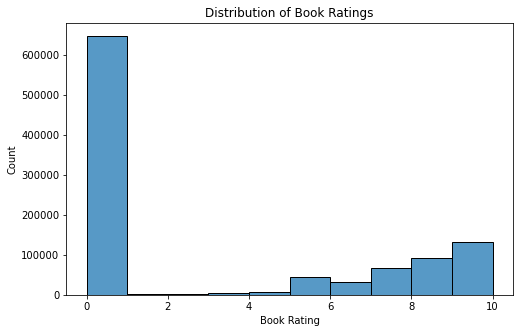

In [55]:
#Plot the graph
plt.figure(figsize=(8, 5))
sns.histplot(merged_df1['Rating'], bins=10, kde=False)

plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()

#### Explanation
Many users rarely rated the books they have read making the rating of 0 dominant. This is a challenge and may skew the data.The other majority of ratings are concentrated in the higher range ratings of 8, 9, and 10, indicating that users tend to give positive ratings. There's a gradual decline in counts as ratings decrease from 10 to 1. Ratings between 1 and 4 are significantly less frequent, suggesting that users are less likely to give very low ratings.

### B. Most Common Authors
This shows the most frequent authors in the dataset based on the number of books they have authored and may reflect author's popularity.

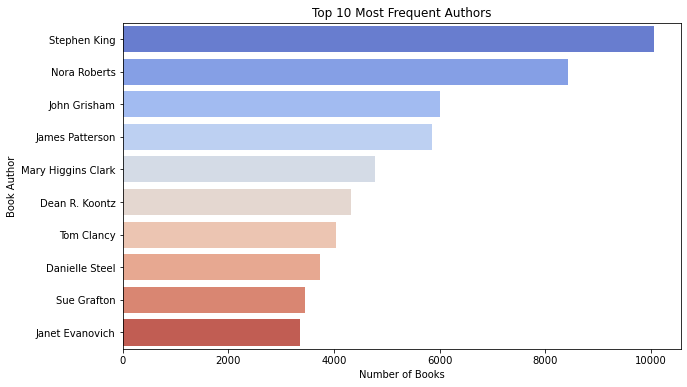

In [59]:
# Top 10 most frequent Authors
top_authors = merged_df1['Author'].value_counts().head(10)

# Plot for Top 10 Authors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='coolwarm')
plt.title('Top 10 Most Frequent Authors')
plt.xlabel('Number of Books')
plt.ylabel('Book Author')
plt.show()

### Explanation
Based on the graph above, Stephen King is the most frequent author in the dataset, with over 10,000 books while Janet Evanovich seems to be the least frequent authour from or graph. It gives a clear visual of how much more frequent Stephen King's books are compared to the rest, showing him as a highly prolific author in this dataset.

### C. Age distribution of USer

In [61]:
#Top 25 most frequent user ages
merged_df1['Age'].value_counts().head(25)

33.0    32862
29.0    30646
30.0    27201
32.0    26490
36.0    26096
28.0    25966
31.0    25964
34.0    25893
38.0    22396
27.0    22280
26.0    22107
25.0    21768
44.0    21510
37.0    21116
43.0    20612
35.0    19573
23.0    18793
24.0    18572
47.0    18517
52.0    17637
39.0    17002
46.0    16345
41.0    15900
40.0    15521
49.0    14345
Name: Age, dtype: int64

In [62]:
#Highest age of user 
merged_df1['Age'].max()

244.0

It is doubtful though but true according to our data


Find the mean, median of the users' age and plot a box plot and a normal bar graph for age and count

In [72]:
mean_age = merged_df1['Age'].mean()
median_age = merged_df1['Age'].median()
print(mean_age)
print(median_age)

37.39764848314286
35.0


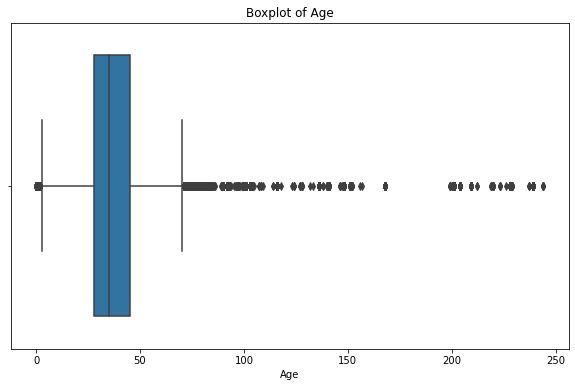

In [76]:
# Boxplot to visualize Age outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df1['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

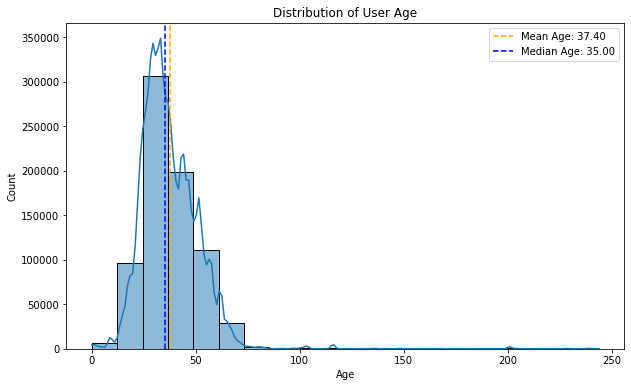

In [75]:
# Plot Distribution of User Age
plt.figure(figsize=(10, 6))
sns.histplot(merged_df1['Age'], bins=20, kde=True)
plt.axvline(mean_age, color='orange', linestyle='--', label=f'Mean Age: {mean_age:.2f}')
plt.axvline(median_age, color='blue', linestyle='--', label=f'Median Age: {median_age:.2f}')
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.legend()
plt.show()


The boxplot highlights a significant number of outliers indicating the need for data cleaning. Users with ages exceeding approximately 75 are flagged as potential outliers, suggesting there are abnormally high age values in the dataset. Values much higher than the median (around 29-33) extend far beyond the normal range of typical users.
Based on the distributions above, majority of the users in the dataset lie between the age 18 to 60. The mean lies at 37 years while the median lies at 35 years suggesting majority of the users are near that age. 
The ages between 25 and 40 seem to dominate the dataset with the peak around ages 29-33, suggesting that most users are young to middle-aged adults. The age distribution covers a wide range from very low to very high values (up to 244 years). There's a long tail extending into the older age ranges, with small numbers of users listed as having ages greater than 100 indicating presence of outliers.



### D. Top Publishers
This shows the top publishers in the dataset which might influence or point on  publisher popularity.

In [77]:
top_publishers = merged_df1['Publisher'].value_counts().head(10)
top_publishers

Ballantine Books            34724
Pocket                      31989
Berkley Publishing Group    28614
Warner Books                25506
Harlequin                   25027
Bantam Books                23598
Bantam                      20007
Signet Book                 19155
Avon                        17352
Penguin Books               17033
Name: Publisher, dtype: int64

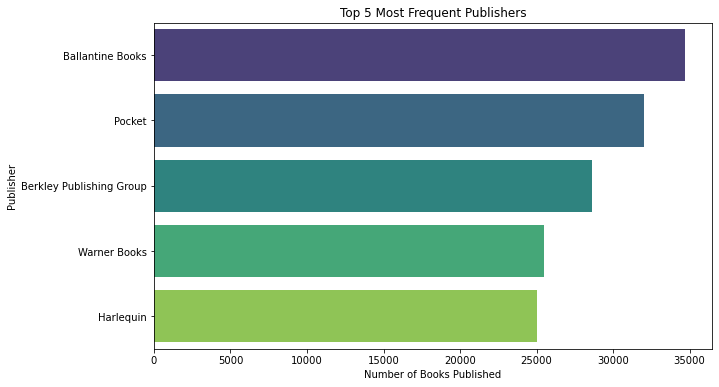

In [79]:
# Top 5 most frequent Publishers
top_publishers = merged_df1['Publisher'].value_counts().head(5)

# Plot for Top 5 Publishers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title('Top 5 Most Frequent Publishers')
plt.xlabel('Number of Books Published')
plt.ylabel('Publisher')
plt.show()

#### 
Based on the graph above,Ballantine Books is the most frequent publisher, with over 34,000 books published, followed by Pocket. Other prominent publishers include Berkley Publishing Group, Warner Books, and Harlequin, with over 25,000 books each. 

## II. Bivariate Analysis

#### A. Book Rating vs User age
Explores the relationship between user age and the ratings they give to books.

In [80]:
# Group by 'Age' and calculate the average 'Book-Rating'
average_rating_by_age = merged_df1.groupby('Age')['Rating'].mean().reset_index()

# Rename the columns
average_rating_by_age.columns = ['Age', 'Average Book-Rating']
average_rating_by_age

,Age,Average Book-Rating
0,0.0,2.859180
1,1.0,3.464953
2,2.0,4.214953
3,3.0,4.923077
4,4.0,4.630996
...,...,...
136,228.0,0.492063
137,229.0,2.000000
138,237.0,3.333333
139,239.0,2.206897


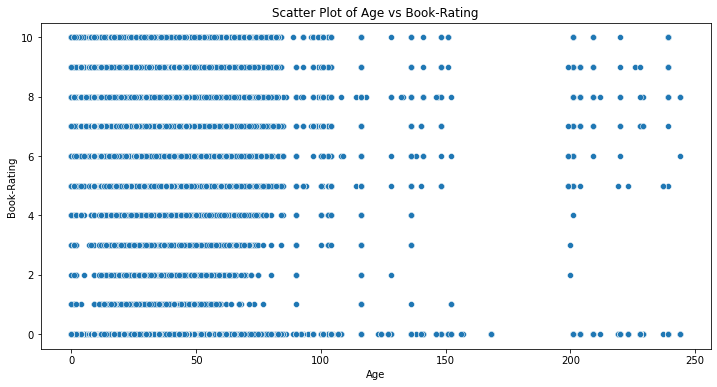

In [83]:
#Plot a Scatter plot of Book-Rating vs Age
plt.figure(figsize=(12, 6))
sns.scatterplot(x=merged_df1['Age'], y=merged_df1['Rating'])
plt.title('Scatter Plot of Age vs Book-Rating')
plt.xlabel('Age')
plt.ylabel('Book-Rating')
plt.show()



The scatterplot reveals the distribution of ratings based on user age. Users between 0 to approximately 90 years are densely distributed throughout the ratings. The presence of outliers may influence the observations made as the age is seen to range from 0 up to 244 years.

### B. Publisher vs. Average Book Rating
This examines whether certain publishers consistently publish books that receive higher ratings.

In [87]:
avg_ratings_publisher = merged_df1.groupby('Publisher')['Rating'].mean().sort_values(ascending=False).reset_index()
avg_ratings_publisher.head(10)

,Publisher,Rating
0,Editions P. Terrail,10.0
1,"Family CareWare, Inc.",10.0
2,Koehler &amp; Amelang Verlag MÃ?Â¼nchen Berlin,10.0
3,Koenisha Publications,10.0
4,Fandata Computer Services,10.0
5,Kristina DeVary,10.0
6,Crazy Pet Press,10.0
7,Stabur Pr,10.0
8,St.Martin's,10.0
9,KnÃ¶dler,10.0


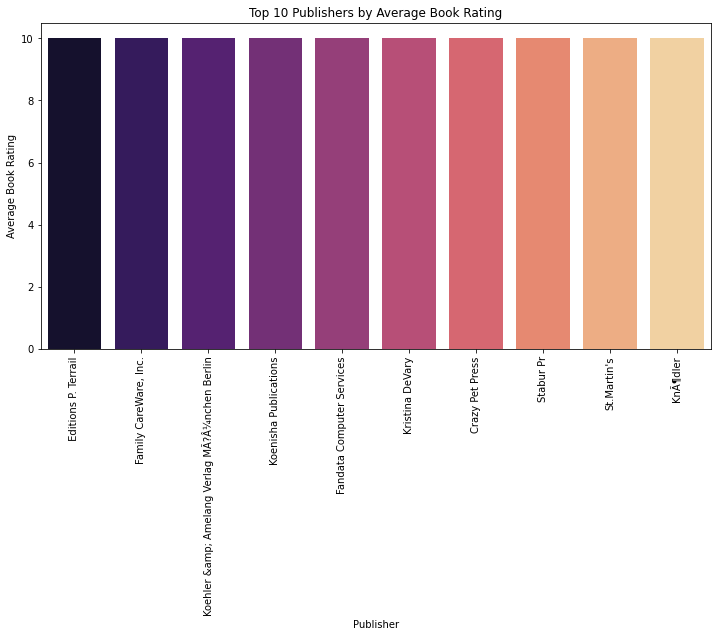

In [89]:
#Plot the graph
# Define a custom color palette
colors = sns.color_palette("crest", len(avg_ratings_publisher.head(10)))

plt.figure(figsize=(12, 6))
sns.barplot(x='Publisher', y='Rating', data=avg_ratings_publisher.head(10), palette='magma')
plt.xticks(rotation=90)
plt.title('Top 10 Publishers by Average Book Rating')
plt.xlabel('Publisher')
plt.ylabel('Average Book Rating')
plt.show()


The bar plot visually shows that all publishers in the top 10 have achieved a 10.0 average rating. The publishers could be from a diverse range of industries, from mainstream to niche publishing houses.In the analysis, books published by these top-rated publishers could be prominently featured in recommendation system for users who are likely to appreciate such content.Knowing which publishers consistently produce high-rated books allows for targeted advertising strategies, particularly for niche books that may attract specific types of readers. 
